            Athlete Name  Year of Birth  First Game Year  Medals Count
1            Maki Tabata            NaN           2000.0           0.0
3   Lillehammer Olympics            NaN              NaN           0.0
4           South Africa         1996.0           1995.0           0.0
10       Michael Olajide            NaN           1994.0           0.0
12     European Champion         1976.0           1974.0           0.0


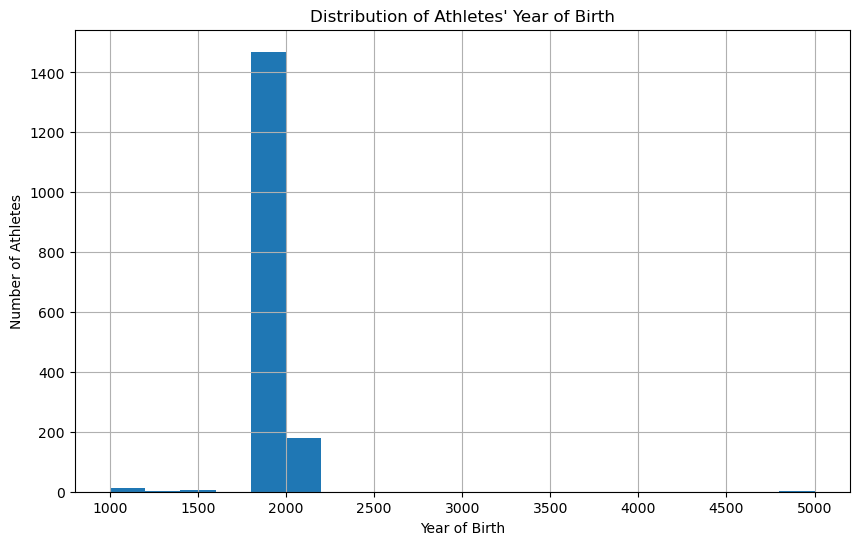

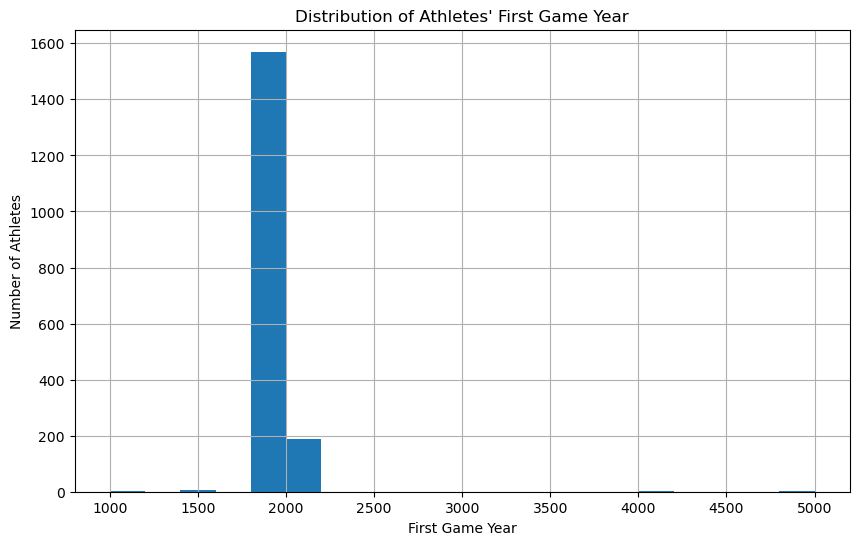

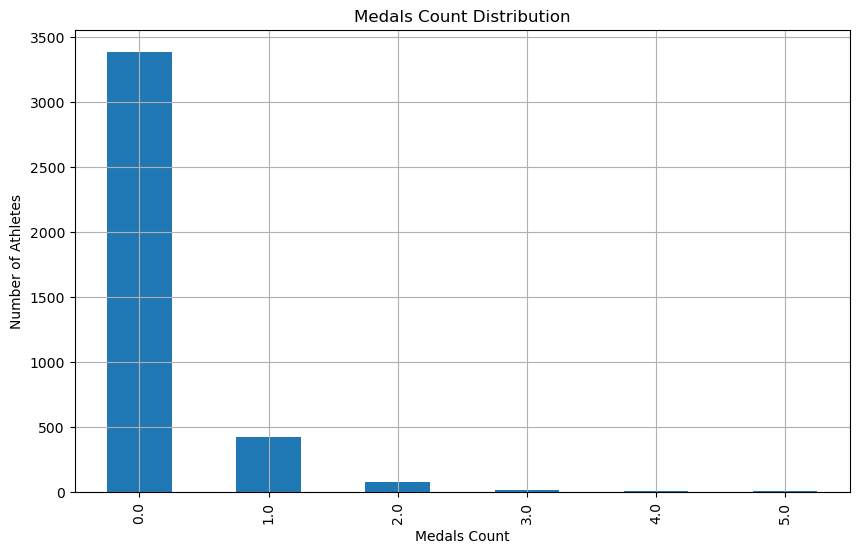

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the CSV file
file_path = 'cleaned_olympic_athletes.csv'
data = pd.read_csv(file_path)

# Function to extract meaningful data from relatively structured rows
def focused_extraction(row):
    # Athlete name extraction (first two capitalized words)
    name_match = re.search(r'\b[A-Z][a-z]*\s[A-Z][a-z]*\b', row['athlete_full_name'])
    name = name_match.group(0) if name_match else None
    
    # Extract year of birth
    birth_match = re.search(r'\b\d{4}\b', row['athlete_year_birth'])
    birth_year = int(birth_match.group(0)) if birth_match else None
    
    # Extract first game year
    first_game_match = re.search(r'\b\d{4}\b', row['first_game'])
    first_game_year = int(first_game_match.group(0)) if first_game_match else None
    
    # Extract medals information (simple count of keywords)
    medals = row['athlete_medals']
    medals_count = len(re.findall(r'\b(gold|silver|bronze)\b', medals.lower())) if medals else 0
    
    return pd.Series([name, birth_year, first_game_year, medals_count])

# Apply the focused extraction function to each row
focused_data = data.apply(focused_extraction, axis=1)
focused_data.columns = ['Athlete Name', 'Year of Birth', 'First Game Year', 'Medals Count']

# Filter out rows without a valid athlete name
focused_data = focused_data[focused_data['Athlete Name'].notnull()]

# Convert 'Year of Birth' and 'First Game Year' to numeric, handling NaN values
focused_data['Year of Birth'] = pd.to_numeric(focused_data['Year of Birth'], errors='coerce')
focused_data['First Game Year'] = pd.to_numeric(focused_data['First Game Year'], errors='coerce')

# Display the first few rows of the focused data
print(focused_data.head())

# Plotting the distribution of athletes' year of birth
plt.figure(figsize=(10, 6))
focused_data['Year of Birth'].dropna().astype(int).plot(kind='hist', bins=20, title="Distribution of Athletes' Year of Birth")
plt.xlabel('Year of Birth')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

# Plotting the distribution of athletes' first game year
plt.figure(figsize=(10, 6))
focused_data['First Game Year'].dropna().astype(int).plot(kind='hist', bins=20, title="Distribution of Athletes' First Game Year")
plt.xlabel('First Game Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

# Plotting the medals count distribution
plt.figure(figsize=(10, 6))
focused_data['Medals Count'].value_counts().plot(kind='bar', title='Medals Count Distribution')
plt.xlabel('Medals Count')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()


        game_slug game_end_date game_start_date game_location       game_name  \
0    beijing-2008    2008-08-24      2008-08-08         China    Beijing 2008   
1      paris-1900    1900-10-28      1900-05-14        France      Paris 1900   
2    beijing-2022    2022-02-20      2022-02-04         China    Beijing 2022   
3       oslo-1952    1952-02-25      1952-02-14        Norway       Oslo 1952   
4  amsterdam-1928    1928-08-12      1928-05-17   Netherlands  Amsterdam 1928   

  game_season  game_year  
0      Summer       2008  
1      Summer       1900  
2      Winter       2022  
3      Winter       1952  
4      Summer       1928  
Number of unique locations: 26
Number of unique seasons: 2
Number of unique years: 37


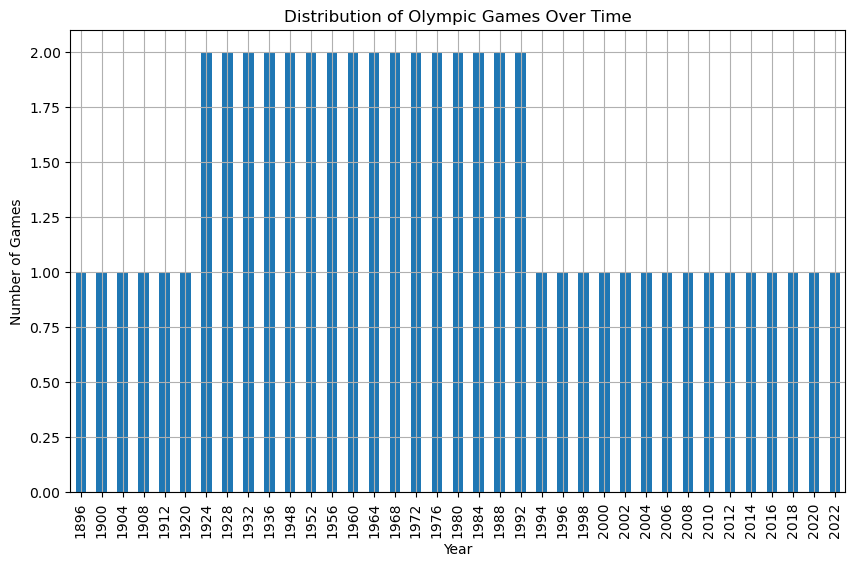

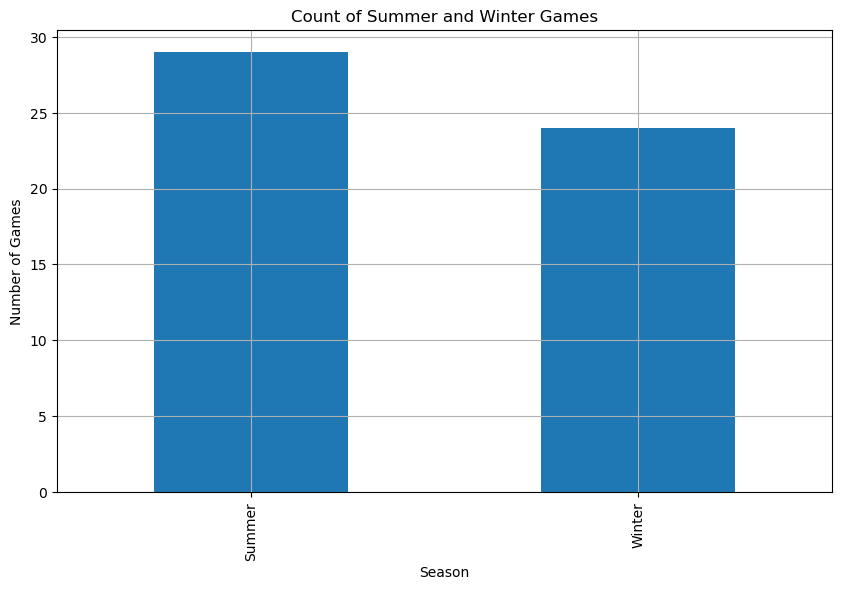

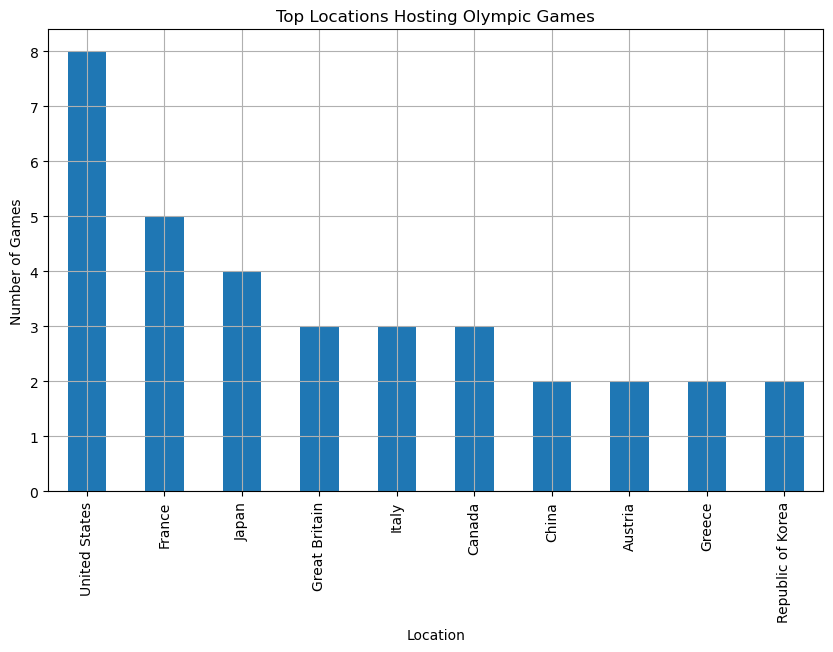

In [10]:

import matplotlib.pyplot as plt

# Load the newly uploaded CSV file
file_path = 'cleaned_olympic_hosts.csv'
hosts_data = pd.read_csv(file_path)

# Display the first few rows of the hosts dataset
print(hosts_data.head())

# Basic Statistics
num_unique_locations = hosts_data['game_location'].nunique()
num_unique_seasons = hosts_data['game_season'].nunique()
num_unique_years = hosts_data['game_year'].nunique()

print(f"Number of unique locations: {num_unique_locations}")
print(f"Number of unique seasons: {num_unique_seasons}")
print(f"Number of unique years: {num_unique_years}")

# Games Over Time
plt.figure(figsize=(10, 6))
hosts_data['game_year'].value_counts().sort_index().plot(kind='bar', title='Distribution of Olympic Games Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

# Games by Season
plt.figure(figsize=(10, 6))
hosts_data['game_season'].value_counts().plot(kind='bar', title='Count of Summer and Winter Games')
plt.xlabel('Season')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

# Games by Location
top_locations = hosts_data['game_location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', title='Top Locations Hosting Olympic Games')
plt.xlabel('Location')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()
